In [1]:
import os
import numpy as np

## Section 1: Simulations

In [2]:
from tqdm import tqdm
from scipy.stats import spearmanr

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
n_sim = 5000
n_sub = 100

## Population distribution.
mixing = [0.85,0.15]

## Task behavior distribution. 
params_task = [(24,8), (20,20)]

## Self-report behavior distributions.
params_sr   = [
    [(12,12), (12,12)],
    [(1.5,4), (12,12)]
]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Perform simulations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
X = np.zeros((n_sub,2)); Y = np.zeros((n_sub,2))
rvals = np.zeros((n_sim,2)); pvals = np.zeros((n_sim,2))

## Iteratively perform simulations.
for i in range(2):
    
    np.random.seed(0)
    for j in tqdm(range(n_sim)):
        
        ## Sample task behavior.
        y = np.concatenate([np.random.beta(*param,int(n_sub*p)) for param, p in zip(params_task,mixing)])
        if not j: Y[:,i] = y
        
        ## Sample self-report behavior.
        x = np.concatenate([np.random.beta(*param,int(n_sub*p)) for param, p in zip(params_sr[i],mixing)])
        if not j: X[:,i] = x

        ## Compute correlation.
        rvals[j,i], pvals[j,i] = spearmanr(x, y)
        
## Return false positive rate.
print('Rho:', rvals.mean(axis=0).round(3))
print('FPR:', (pvals < 0.05).mean(axis=0).round(3))

100%|██████████| 5000/5000 [00:03<00:00, 1348.15it/s]

Rho: [ 0.001 -0.269]
FPR: [0.054 0.81 ]


## Section 2: Plotting

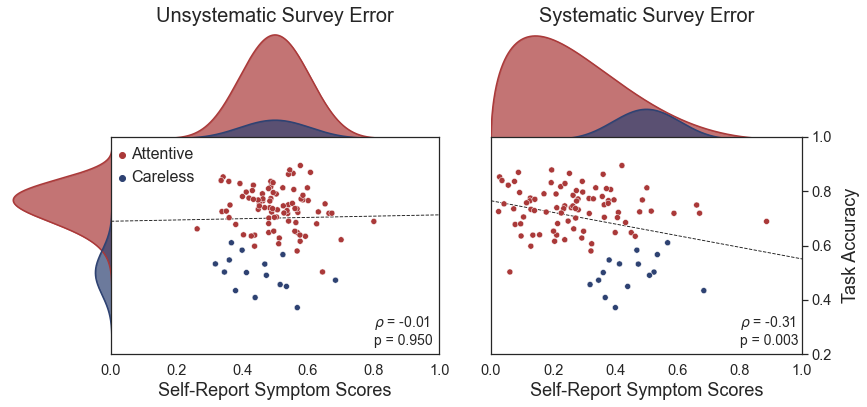

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.stats import norm, beta
sns.set_theme('notebook', style='white', font='sans-serif', font_scale=1.33)
%matplotlib inline

## Initialize canvas.
fig = plt.figure(figsize=(12,6))

## Initialize panels.
panel_1 = fig.add_gridspec(nrows=3, ncols=1, left=0.00, right=0.12, wspace=0, hspace=0)
panel_2 = fig.add_gridspec(nrows=3, ncols=2, left=0.12, right=0.50, wspace=0, hspace=0)
panel_3 = fig.add_gridspec(nrows=3, ncols=2, left=0.56, right=0.92, wspace=0, hspace=0)

## Define plot features.
hue = np.concatenate([np.repeat(i,int(n_sub*p)) for i, p in enumerate(mixing)])
palette = ['#AA3939','#2E4272']
x = np.linspace(0,1,1001)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 1: y-margins.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize axis.
ax = plt.subplot(panel_1[1:,0])

## Iteratively plot distributions.
for i, (p, color) in enumerate(zip(mixing, palette)):
    y = beta(*params_task[i]).pdf(x) * p
    ax.plot(y, x, color=color)
    ax.fill_betweenx(x, y, -1, color=color, alpha=0.7)

## Add details.
ax.set(xlim=(5e-2), xticks=[], ylim=(0.2,1.0), yticks=[])
ax.invert_xaxis()
sns.despine(left=True, bottom=True, top=True, right=True, ax=ax)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2: x-margins.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize axis.
ax = plt.subplot(panel_2[0,:])

## Iteratively plot distributions.
for i, (p, color) in enumerate(zip(mixing, palette)):
    y = beta(*params_sr[0][i]).pdf(x) * p
    ax.plot(x, y, color=color)
    ax.fill_between(x, y, -1, color=color, alpha=0.7)

## Add details.
ax.set(xlim=(0.0,1.0), xticks=[], ylim=(5e-2), yticks=[])
ax.set_title('Unsystematic Survey Error', fontsize=20)
sns.despine(left=True, bottom=True, top=True, right=True, ax=ax)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 2: scatterplot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize axis.
ax = plt.subplot(panel_2[1:,:])

## Plot scatterplot.
ax.set(xlim=(0.0,1.0), ylim=(0.2,1.0), yticks=[])
sns.scatterplot(x=X[:,0], y=Y[:,0], hue=hue, palette=palette, ax=ax)
sns.regplot(x=X[:,0], y=Y[:,0], scatter=False, ci=None, truncate=False, 
            color='k', line_kws=dict(lw=0.9, linestyle='--', zorder=-1), ax=ax)

## Add details.
ax.set_xlabel('Self-Report Symptom Scores', fontsize=18)

## Add legend.
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Attentive','Careless'], loc=2, bbox_to_anchor=(-0.06,1.02), 
          frameon=False, handletextpad=-0.4, columnspacing=0, fontsize=16)

## Add annotation.
annot = r'$\rho$ = %0.2f' %rvals[0,0] + '\np = %0.3f' %pvals[0,0]
ax.annotate(annot, (0,0), (0.80,0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize=14)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 3: x-marigns.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize axis.
ax = plt.subplot(panel_3[0,:])

## Iteratively plot distributions.
for i, (p, color) in enumerate(zip(mixing, palette)):
    y = beta(*params_sr[1][i]).pdf(x) * p
    ax.plot(x, y, color=color)
    ax.fill_between(x, y, -1, color=color, alpha=0.7)

## Add details.
ax.set(xlim=(0.0,1.0), xticks=[], ylim=(5e-2), yticks=[])
ax.set_title('Systematic Survey Error', fontsize=20)
sns.despine(left=True, bottom=True, top=True, right=True, ax=ax)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Panel 3: scatterplot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize axis.
ax = plt.subplot(panel_3[1:,:])

## Plot scatterplot.
ax.set(xlim=(0.0,1.0), ylim=(0.2,1.0))
sns.scatterplot(x=X[:,1], y=Y[:,1], hue=hue, palette=palette, legend=False, ax=ax)
sns.regplot(x=X[:,1], y=Y[:,1], scatter=False, ci=None, truncate=False, 
            color='k', line_kws=dict(lw=0.9, linestyle='--', zorder=-1), ax=ax)

## Add details.
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_xlabel('Self-Report Symptom Scores', fontsize=18)
ax.set_ylabel('Task Accuracy', fontsize=18, labelpad=10)

## Add annotation.
annot = r'$\rho$ = %0.2f' %rvals[0,1] + '\np = %0.3f' %(pvals[0,1]+1e-3)
ax.annotate(annot, (0,0), (0.80,0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize=14)

## Save figure.
plt.savefig(os.path.join('..','figures','main_01.png'), dpi=180, transparent=True)